In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

1. Analyze only the users and not the admins
2. Create two lists of values (for working days and for weekends) for the histogram input
3. The figsize is still the same, you can choose the fontsize as well as the color palette
4. Use a level of transparency for the histogram in front equal to 0.7

In [3]:
query = """
SELECT strftime("%H", timestamp) AS hour,
    1 AS commits,
    CASE 
        CAST(strftime('%w', timestamp) AS INT)
        WHEN 0 THEN 'weekend'
        WHEN 6 then 'weekend'
        ELSE 'working_day'
    END AS day_type
FROM checker
WHERE uid NOT LIKE 'admin_%'
ORDER BY day_type, hour
"""

In [4]:
df_commits_day_type = pd.read_sql(query, con)
df_commits_day_type

,hour,commits,day_type
0,00,1,weekend
1,00,1,weekend
2,00,1,weekend
3,00,1,weekend
4,00,1,weekend
...,...,...,...
3202,23,1,working_day
3203,23,1,working_day
3204,23,1,working_day
3205,23,1,working_day


In [5]:
con.close()

In [6]:
commits_sum = df_commits_day_type.groupby(['hour', 'day_type']).sum()
commits_sum

commits
hour day_type            
00   weekend            6
     working_day        6
01   weekend            6
03   weekend            1
     working_day        2
05   weekend            2
     working_day       15
06   working_day        3
07   weekend           16
     working_day       31
08   weekend           28
     working_day       37
09   weekend           22
     working_day       30
10   weekend           28
     working_day      132
11   weekend          118
     working_day       88
12   weekend           57
     working_day       79
13   weekend          108
     working_day       73
14   weekend           87
     working_day      122
15   weekend          114
     working_day      141
16   weekend           74
     working_day      170
17   weekend           50
     working_day      192
18   weekend           68
     working_day      167
19   weekend          105
     working_day      214
20   weekend          117
     working_day      183
21   weekend           72
     working_day      292
22   weekend           59
     working_day       45
23   weekend           32
     working_day       15

In [7]:
graph_data = commits_sum.unstack('day_type').fillna(0)
graph_data.columns = ['weekend', 'working_days']
graph_data

,weekend,working_days
hour,,
00,6.0,6.0
01,6.0,0.0
03,1.0,2.0
05,2.0,15.0
06,0.0,3.0
07,16.0,31.0
08,28.0,37.0
09,22.0,30.0
10,28.0,132.0


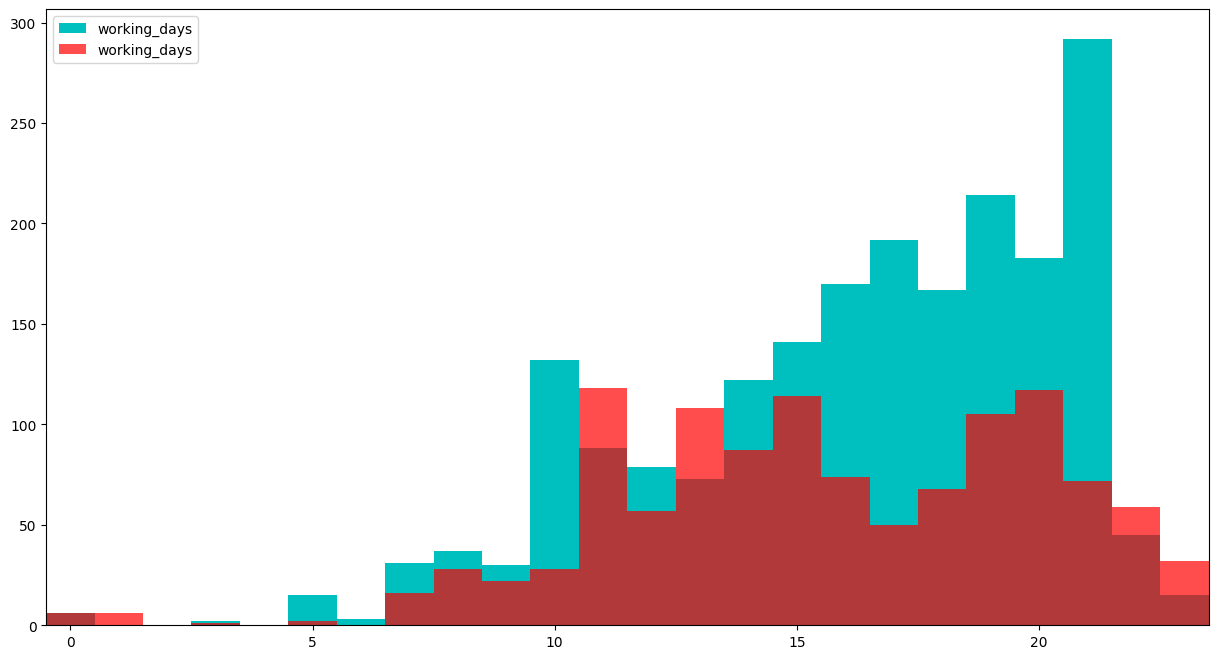

In [8]:
plt.figure(figsize=(15.0, 8.0))

hours = [int(h) for h in graph_data.index]

plt.bar(
    hours,
    graph_data['working_days'].values,
    width=1,
    color='c',
    label='working_days'
)

plt.bar(
    hours,
    graph_data['weekend'].values,
    width=1,
    alpha=0.7,
    color='red',
    label='working_days'
)

plt.xticks([0, 5, 10, 15, 20])
plt.yticks([0, 50, 100, 150, 200, 250, 300])
plt.legend()
plt.margins(x=0)

plt.show()

* “Are there hours when the total number of commits was higher on weekends than on working days?”

* In your answer, put the top-4 examples.

Question:

Are there hours when the total number of commits was higher on weekends than on working days?

Answer:

Yes, the number of commits on weekends exceeded the number of commits on weekdays at ***11***, ***13***, ***22*** and ***23*** hours